# Titanic - Machine Learning from Disaster (Kaggle Competition)

The following Jupiter Notebook is used to walk you through the [Titanic - Kaggle Competition](https://www.kaggle.com/c/titanic/overview). The are two .csv files, our data sets, already split into *train* and *test* set.

### Exploratory Data Analysis

In [347]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [348]:
# Loading data sets as pandas DataFrames
TITANIC_PATH = "/content/drive/MyDrive/Kaggle/Titanic/"

train, test = pd.read_csv(TITANIC_PATH + "train.csv"), pd.read_csv(TITANIC_PATH + "test.csv")

In [349]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we see from the `info()` function above, there are some **missing values** for few variables (`Age`, `Cabin`, `Embarked`). In addition, some of the variables are **categorical value**s such as `Sex`, `Ticket`, and so on. After getting a first understanding of the date set we are dealing with, we will address the missing values issue.

In [351]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First, let's check if we are dealing with an **imbalanced data set**. To find it out, we can simply look at the ratio of 1s or 0s for our target attribute, `Survived`.

In [352]:
train["Survived"].value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

The data set is slightly imbalanced (60/40) in favour of 0 (people who didn't survived, unforunately!). This shouldn't be a big problem, though. Ww might want to be carefull when choosing the metrics to evaluate our models.

Let's take a closer look at the attribute `Ticket`. For example, we want to know whether each person gets a unique ticket, whether a "family" gets a unique ticket or if each ticket costs the same `Fare`.

In [353]:
# 1. Checking if each person gets a unique ticket.
train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
347466      1
367232      1
312991      1
36866       1
218629      1
Name: Ticket, Length: 681, dtype: int64

As we see from the cell above, `Ticket = "1601"` was issued to 7 differente persons. Hence, tickets are not indivudually sold. We can now check if all the 7 persons belong to the same family. To do so, we split `Name` into `FamilyName` and `FirstName`. We can then look at the family names of the 7 persons with the same ticket.

In [354]:
# Splitting "Name" into "FamilyName" and "FirstName"
train[["FamilyName", "FirstName"]] = train["Name"].str.split(",", expand=True)
train[["Name", "FamilyName", "FirstName"]].head()

,Name,FamilyName,FirstName
0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry",Allen,Mr. William Henry


In [355]:
# Checking if people with the same ticket are part of the same family
TICKET = "1601"

train["FamilyName"][train["Ticket"] == TICKET].value_counts()

Lam     2
Ling    1
Chip    1
Lang    1
Foo     1
Bing    1
Name: FamilyName, dtype: int64

From the cell above, we can conclude that people who do not belong to the same family (different family names) can still get assigned the same ticket number.

In [356]:
TICKET = "CA. 2343"

train["FamilyName"][train["Ticket"] == TICKET].value_counts()

Sage    7
Name: FamilyName, dtype: int64

In [357]:
train[train["Ticket"] == TICKET]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Master. Thomas Henry
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss. Constance Gladys
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr. Frederick
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr. George John Jr
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss. Stella Anna
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr. Douglas Bullen
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,"Miss. Dorothy Edith ""Dolly"""


From a second try (different ticket number), we can see that the same ticket number is issued only to the persons belonging to the same family group (Sage). My **assumption** is that there is a relation between a gruop of people (family, friends, etc.) and the ticket number. This might be an interesting relation to check up later as people belonging to the same group (family, friends, etc.) tend to stay together.

Let's now check if there is a unique relation between `Ticket` and `Fare`. In other words, if the same ticket has always the same fare and if the same fare is issued alaways to the same ticket. If this kind of relation exists, we would prefer working with `Fare` over `Ticket` as Fare is a numerical attribute.

In [358]:
# with pd.option_context('display.max_rows', None): --- Not used --- 
print(train.groupby("Fare")["Ticket"].nunique().sort_values(ascending=False))

Fare
8.0500      43
13.0000     41
7.8958      38
7.7500      34
10.5000     23
            ..
23.2500      1
22.5250      1
22.3583      1
22.0250      1
512.3292     1
Name: Ticket, Length: 248, dtype: int64


Not quite what we wished for. Unfortunatelly, the same price may be applied to different tickets. For example, there are 43 different tickets all with the cost of 8.0500.

Let's now anticipate some data pre-processing steps. In particular we are going to convert `Sex` (male, female) to numbers (1, 0). We will convert `Embarked` to numbers by using **OneHotEncoder**. In simple words, we are going to add a dummy column for each categorical value in `Embarked` attribute. The value will get 1 only if the dummy column corresponds to the `Emmbarked` feature. For each entry, we will have a single value 1 and the rest will be 0s.

First, remember that for the attribute `Embarked` we don't have all the values. Indeed, two are missing (889/891). In order to encode the attribute in dummy variables, we have first to impute the **missing values**. We'll use the most common value strategy.

In [359]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Converting (male, female) to (1, 0)
train_tr = train.copy() # This will be the data set we will use to apply transformation, keeping the original untouched

sex_to_num = LabelEncoder()
train_tr["Sex"] = sex_to_num.fit_transform(train_tr["Sex"])
train_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [360]:
from sklearn.impute import SimpleImputer

# Imputing missing values for "Embarked" according to the most frequent one
imputer = SimpleImputer(strategy="most_frequent")

train_tr["Embarked"] = imputer.fit_transform(train_tr[["Embarked"]])
train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilyName   891 non-null    object 
 13  FirstName    891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


Noe that we have all the values we can proceed with dummy encoding.

In [361]:
# Dummy encoding "Embarked"
embarked_encoder = OneHotEncoder()

embarked_1hot = embarked_encoder.fit_transform(train_tr[["Embarked"]])
embarked_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [362]:
# Adding the dummy columns to the data set 
train_tr[["Embarked_C", "Embarked_Q", "Embarked_S"]] = pd.DataFrame(embarked_1hot.toarray())

# Drooping "Embarked" attribute
train_tr.drop("Embarked", axis=1, inplace=True)

In [363]:
train_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyName,FirstName,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Allen,Mr. William Henry,0.0,0.0,1.0


Let's now visualize the data.

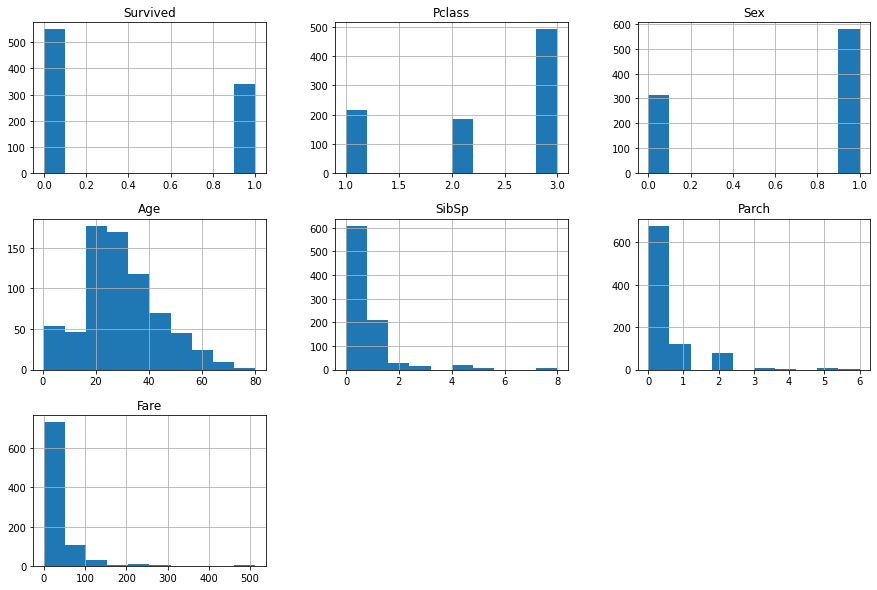

In [364]:
%matplotlib inline

train_tr.drop(["PassengerId", "Embarked_C", "Embarked_Q", "Embarked_S"], axis=1).hist(bins=10, figsize=(15,10))  # Getting rid of "PassengerID"
plt.show()

From the plots above we do not observe any anomaly. We can proceed furhter and look for **correlations**.

In [365]:
# We first look for correlations between the target variable and all the other numerical values
corr_matrix = train_tr.corr()

corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Embarked_S    -0.149683
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

The list above tells us that the most target-correlated attributes are `Sex`, `Pclass`, and `Fare`. Sure enough, we can assume that the last two are also correlated between each other (`Pclass` and `Fare`). Namely, the higher the fare the lower the class (1 is lower than 2, we consider ordinal number not cardinal. This explains the negative sign for `Pclass`).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90be6b55c0>,
      dtype=object)

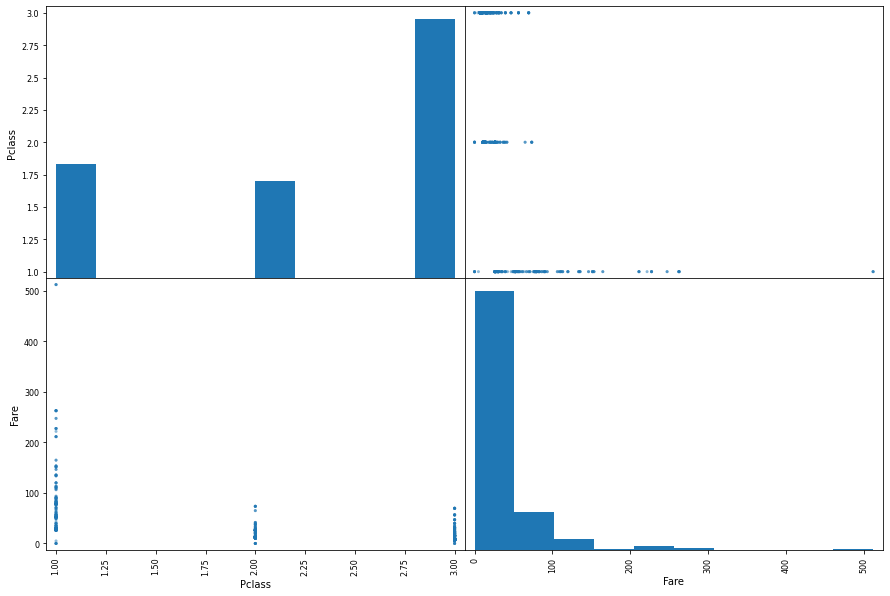

In [366]:
from pandas.plotting import scatter_matrix

# Looking for correlations between "PClass" and "Fare"
attributes = ["Pclass", "Fare"]
scatter_matrix(train_tr[attributes], figsize=(15,10))

The scatter plot above, shows a correlation between `Pclass` and `Fare` at least for the 1st class with prices ranging from literally zero dollars to more than $500. For 2nd and 3rd class, fares seem to be within the same range.

Let's try to remove all the first class entries and see whether the scatter plot scale down.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90be4db438>,
      dtype=object)

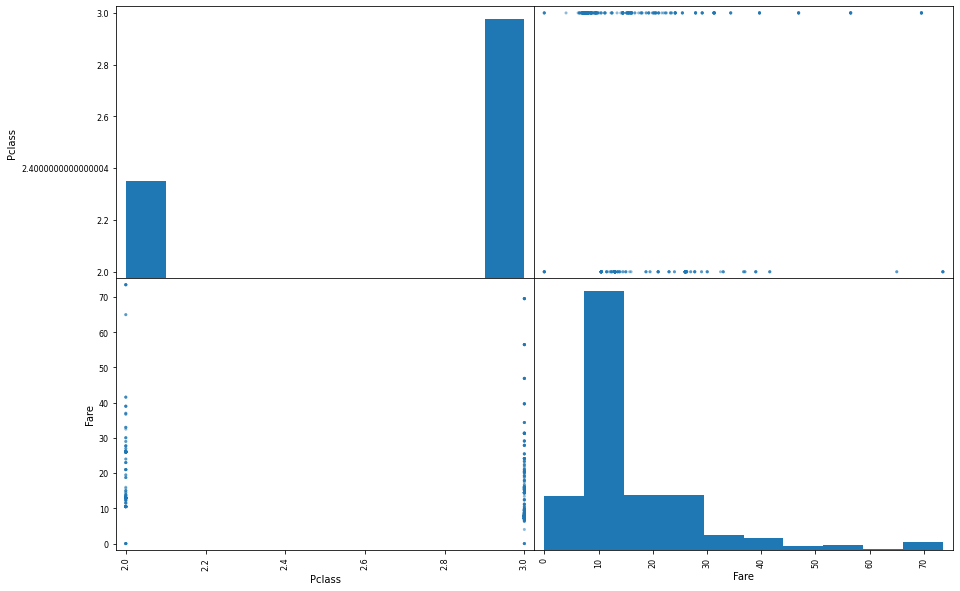

In [367]:
# Plotting only 2nd and 3rd class entries to look for correlations between "Pclass" and "Fare"
train_tr_2_3_class = train_tr[train_tr["Pclass"] != 1].copy()

scatter_matrix(train_tr_2_3_class[attributes], figsize=(15,10))

There aren't remarkable differences between second and third class in terms of fares.

The most promising attributes to predict whehter a passanger survives or not is the **gender** and the **passenger class**. Let's start by taking a look at the proportion of passengers survived for each travel class.

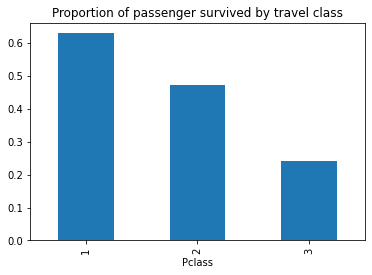

In [368]:
# Counting how many passengers survived out of the total number of passengers for each class and plot the results
survived_ratios_per_class = train_tr.groupby("Pclass")["Survived"].sum() / train_tr.groupby("Pclass")["Survived"].count()
survived_ratios_per_class.plot.bar(title="Proportion of passenger survived by travel class")

The bar chart above shows a clear picture. People in first class have a higher survive rate (almost three times higher than people in third class!). Now, let's do the same with `Sex` attribute (remember `1 = male`, `0 = female`).

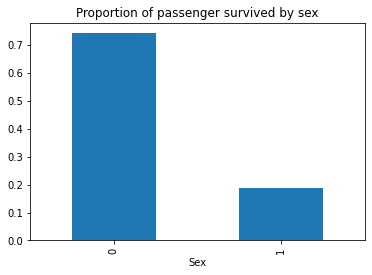

In [369]:
# Counting how many passengers survived out of the total number of passengers for each gender and plot the results
survived_ratios_per_class = train_tr.groupby("Sex")["Survived"].sum() / train_tr.groupby("Sex")["Survived"].count()
survived_ratios_per_class.plot.bar(title="Proportion of passenger survived by sex")

It seems that for most of the men that was their last trip. If you watched the movie *Titanic* you might recall that the first passengers boarded on the boats were, pricisely, woman and children.

We now try experimenting with **attributes combinations**, in other words **feature engineering**. For example, we can create a new attribute called `FamilySize` that simply sums up `Parch` and `SibSp`.

In [370]:
# Summing up "Parch" and "SibSp" to create the new feature "FamilySize"
train_tr["FamilySize"] = train_tr["Parch"] + train_tr["SibSp"]

In [371]:
# Checking the correlation matrix including the new attribute
corr_matrix = train_tr.corr()

corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
FamilySize     0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Embarked_S    -0.149683
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

The new added feature, `FamilySize`, doesn't seem to play an important role. We might want to drop it to keep our data simpler.

In [372]:
train_tr.drop(["FamilySize"], axis=1, inplace=True)

train_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyName,FirstName,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Allen,Mr. William Henry,0.0,0.0,1.0


### Data Preparation

Ok, so far we have had a look at the data, visualize it, and also found out interesting correlations such as `Sex` and `Pclass` with the target variable `Survived`. We have also computed most of the data-preprocessing steps such as:

*   imputing **missing values** for the attributes `Age` and `Embarked`
*   **encoding** the attribute `Emberked` with dummy variables (`Embarked_C`, `Embarked_Q`, `Embarked_S`)
*   converting `Sex` to numbers (`1 = male`, `0 = female`)

We now have to imputing missing values for the attribute `Age`. Let's first do some analysis and see if we can find out some correlations.

In [373]:
# Checking the average (mean and median) age of all the passengers
train_tr["Age"].mean() # 29
train_tr["Age"].median() # 28

# Checking the average (mean and median) age of the passangers based on their sex
train_tr.groupby("Sex")["Age"].mean() # male = 30, female = 27
train_tr.groupby("Sex")["Age"].median() # male = 29, female = 27

Sex
0    27.0
1    29.0
Name: Age, dtype: float64

As we see from above, there are no remarkable changes in the `Age` attribute according to the passenger gender. We can proceed with imputing the missing values. I'll choose the median strategy.

In [374]:
# Imputing missing values in "Age" based on its median value
age_imputer = SimpleImputer(strategy="median")

train_tr["Age"] = age_imputer.fit_transform(train_tr[["Age"]])
train_tr["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

We still have some categorical attributes in text form: `Name`, `FamilyName`, `FirstName`, `Ticket`, and `Cabin`. For now, I decide to ignore these varibles so that we can build simpler models. In addition, the attribute `Ticket` shows some correlation with `Fare`, and `Cabin` contains most missing values. Hence, the idea of ignoring these variables seems reasonble. We'll get back to this point in case our models perform poorly.

In [375]:
train_prepared = train_tr.drop(["Name", "FamilyName", "FirstName", "Ticket", "Cabin"], axis=1)
train_prepared.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


Next step is **feature scaling**. We want to scale all the attributes from 0 to 1, this can easily be calculate with the function [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler). First we remove the target variable from the training set and store in apart.

In [376]:
# Separating target attribute from the other indipendet variables
X_train = train_prepared.drop("Survived", axis=1).copy()
y_train = train_prepared["Survived"].copy()

In [377]:
# Getting rid of "PassengerID"
X_train = X_train.drop("PassengerId", axis=1)

In [378]:
from sklearn.preprocessing import MinMaxScaler

# Scaling each attribute fromo 0 to 1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns) # Returns a np array
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


### Model Selection

In this section we are going to implement a bunch of different Machine Learning algorithmns. The fine-tuning part will follow. In particular we'll try:

*   Multiple Logistic Regression
*   Random Forest
*   Support Vector Machine

The metric to evaluate the performance of each model is **accuracy**. During modelling and evaluation we'll also look at ROC curve though. We'll evalidate the models across the entire data set by means of **cross validation** sets.

In [379]:
# Printing the data set fed into the models below
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [380]:
# Printing the target variable fed into the models below
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

# Fitting a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [382]:
# Calculating scores across cross validation sets
log_reg_scores = cross_val_score(log_reg, X_train, y_train, scoring="accuracy", cv=10)
log_reg_scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

display_scores(log_reg_scores)

Scores: [0.78888889 0.79775281 0.78651685 0.85393258 0.78651685 0.7752809
 0.76404494 0.78651685 0.82022472 0.79775281]
Mean: 0.7957428214731584
Std: 0.023914994151180972


Hey, not bad! We are able to reach an accuracy score of almost 0.8 with a simple logisti regression model. Let's see how more powerful algorithms perform. Next is random forest.

In [383]:
from sklearn.ensemble import RandomForestClassifier

# Fitting a random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [384]:
# As above, checking scores through cross valdation sets
forest_scores = cross_val_score(forest, X_train, y_train, scoring="accuracy", cv=10)
display_scores(forest_scores)

Scores: [0.74444444 0.83146067 0.75280899 0.82022472 0.88764045 0.84269663
 0.82022472 0.75280899 0.84269663 0.84269663]
Mean: 0.8137702871410737
Std: 0.04538931825521958


0.82, slightly better than before. With a RF algorithm we have more room for tuning and therefore improvement though. So, the random forest algorithm seems a good shoot. Let's try with one more algoritm, **SVM**.

In [385]:
from sklearn.svm import SVC

# Fitting a SVM classifier with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [386]:
svm_linear_scores = cross_val_score(forest, X_train, y_train, scoring="accuracy", cv=10)
display_scores(svm_linear_scores)

Scores: [0.75555556 0.80898876 0.75280899 0.85393258 0.8988764  0.85393258
 0.80898876 0.76404494 0.79775281 0.83146067]
Mean: 0.8126342072409487
Std: 0.04544143992436341


In [387]:
# Fitting a SVM classifier with rbf kernel
svm_rbf = SVC()
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [388]:
svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, scoring="accuracy", cv=10)
display_scores(svm_rbf_scores)

Scores: [0.82222222 0.78651685 0.78651685 0.85393258 0.86516854 0.79775281
 0.80898876 0.76404494 0.83146067 0.79775281]
Mean: 0.8114357053682897
Std: 0.030130987213614034


We score 0.81 for our accurcy metric with SVM models. Our next step is **fine-tuning** the **hyperparameters** of the algorithm to get even better accuracy scores. Let's dive in!

For better tuning our algorithms, for semplicity we keep working with the RF mdel, we try to optimize the model hyperparameters with the **Grid Search** method.

In [389]:
from sklearn.model_selection import GridSearchCV

# Optimizing some of the hyperparametes with the GridSearchCV function
param_grid = [
              {"n_estimators": [100, 300, 500, 1000], "max_features": [3, 5, 7, 9]},
              {"bootstrap": [False], "n_estimators": [100, 300, 500], "max_features": [3, 5, 7]}
]

In [390]:
# Building the classifier
forest_clas = RandomForestClassifier()

In [391]:
# Storing the results in a variable
grid_search = GridSearchCV(forest_clas, param_grid, cv=5, scoring="accuracy",
                           return_train_score=True)

In [392]:
# Fitting the model with the combination of parameters provided in "grid_search"
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [393]:
# Printing out the best parameters estimators (hyperparameters)
grid_search.best_params_

{'max_features': 5, 'n_estimators': 1000}

In [394]:
# Printing out the best estimator (model)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We've found out the the best models is 500 trees and contains 5 variables. Let's see how all the combinations have performed by printint all of them out.

In [395]:
# Printing the accuracy score for each combination of parameters
grid_search_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_results["mean_test_score"], grid_search_results["params"]):
    print(mean_score, params)

0.812591802146758 {'max_features': 3, 'n_estimators': 100}
0.8137153976523759 {'max_features': 3, 'n_estimators': 300}
0.8137091205825122 {'max_features': 3, 'n_estimators': 500}
0.8114556525014123 {'max_features': 3, 'n_estimators': 1000}
0.8137216747222397 {'max_features': 5, 'n_estimators': 100}
0.813709120582512 {'max_features': 5, 'n_estimators': 300}
0.8170924612390935 {'max_features': 5, 'n_estimators': 500}
0.8170987383089573 {'max_features': 5, 'n_estimators': 1000}
0.8114933149205952 {'max_features': 7, 'n_estimators': 100}
0.8159751428033394 {'max_features': 7, 'n_estimators': 300}
0.8114870378507313 {'max_features': 7, 'n_estimators': 500}
0.8159751428033394 {'max_features': 7, 'n_estimators': 1000}
0.8047391877471597 {'max_features': 9, 'n_estimators': 100}
0.8092461239093591 {'max_features': 9, 'n_estimators': 300}
0.8103508882053857 {'max_features': 9, 'n_estimators': 500}
0.8081099742640137 {'max_features': 9, 'n_estimators': 1000}
0.799114933149206 {'bootstrap': False,

From what we can observe above, it seems there is no remarkable improvement respect to the standard set of hyperparameters. Let's now try the same with the SVM model this time.

In [396]:
# Optimizing some of the hyperparametes with the GridSearchCV function for the SVM models
param_grid = [
              {"C": [0.01, 0.1, 0.2, 0.5, 1]},
              {"kernel": ["linear"], "C": [0.01, 0.1, 0.2, 0.5, 1]}
]

svm_class = SVC()

# Storing the results in a variable
grid_search_svm = GridSearchCV(svm_class, param_grid, cv=5, scoring="accuracy",
                           return_train_score=True)

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 0.2, 0.5, 1]},
                         {'C': [0.01, 0.1, 0.2, 0.5, 1], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [397]:
# Printing out the best parameters estimators (hyperparameters)
grid_search_svm.best_params_

{'C': 1}

In [398]:
# Printing out the best estimator (model)
grid_search_svm.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [399]:
# Printing the accuracy score for each combination of parameters
grid_search_results = grid_search_svm.cv_results_
for mean_score, params in zip(grid_search_results["mean_test_score"], grid_search_results["params"]):
    print(mean_score, params)

0.6161634548992531 {'C': 0.01}
0.7912246563304249 {'C': 0.1}
0.7968363567886511 {'C': 0.2}
0.8080848659845584 {'C': 0.5}
0.8114556525014125 {'C': 1}
0.7867365513778168 {'C': 0.01, 'kernel': 'linear'}
0.7867365513778168 {'C': 0.1, 'kernel': 'linear'}
0.7867365513778168 {'C': 0.2, 'kernel': 'linear'}
0.7867365513778168 {'C': 0.5, 'kernel': 'linear'}
0.7867365513778168 {'C': 1, 'kernel': 'linear'}


Like for the RF model, the best hyperparameters for the SVM model seem to be the standard one. At this point there is no much we can do (sure, more fine-tuning is possible). Thinking back about our data set, there are some variable we left out like `Cabin`. The reason why `Cabin` may turn into a useful variable has to do with the social status of certain passengers. In different words, passenger with known cabin number can indicate the elitary status of the passengers and they might have been brought in salvetion before then other passengers.

We are going to assign `1` when the value for `Cabin` is not missing, `0` if it is. This way we do not need to scale the values as `1`s and `0`s are already min and max.

In [400]:
# Adding to out ready-for-modelling data set X_train, the column related to "Cabin" after imputing missing values and changing the labels
cabin_col = train_tr["Cabin"].fillna(0).copy()
cabin_col.where(cabin_col == 0, 1, inplace=True)

In [401]:
# Adding the "Cabin" column to the X_train data set
X_train["Cabin"] = cabin_col

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,1
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0


Let's now try to fit a RF model to the new data set and see if we have been able to improve our accuracy score.

In [402]:
# Fitting a random forest classifier
forest_cabin = RandomForestClassifier()
forest_cabin.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [403]:
# As above, checking scores through cross valdation sets
forest_cabin_scores = cross_val_score(forest_cabin, X_train, y_train, scoring="accuracy", cv=10)
display_scores(forest_cabin_scores)

Scores: [0.77777778 0.79775281 0.76404494 0.79775281 0.86516854 0.82022472
 0.79775281 0.7752809  0.87640449 0.84269663]
Mean: 0.8114856429463171
Std: 0.03661994475379871


Unfortunately, no improvement at all!. We can look at the **variable importance** for our RF model and see if adding the new variable was a bad idea.

In [404]:
# Printing out the feature importances of our RF model
feature_importances = forest.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.27685921886630993, 'Fare'),
 (0.2591853812315341, 'Sex'),
 (0.2538406195654305, 'Age'),
 (0.09017245072441792, 'Pclass'),
 (0.04892712515029592, 'SibSp'),
 (0.03633429471505055, 'Parch'),
 (0.014512067335174773, 'Embarked_S'),
 (0.012839802552562722, 'Embarked_C'),
 (0.007329039859223633, 'Embarked_Q')]

As for the **correlation matrix** the most important variables are `Sex` and `Age`. On the other hand, Cabin doesn't seem to be so important. Therefore, I decide to leave it out.

In [405]:
# Dropping out the attribute "Cabin"
X_train.drop("Cabin", axis=1, inplace=True)

### Model Final Test

We are now few steps away from the end of this fantastic project. We have to predict the target variable of our **test set**. I decided to choose the rendom forest algorithm for this pourpuse. Moreover, we need to apply the same transformation steps we applied to our training set to the test set. (Tip: The best thing to do is to build a *pipeline* that applies all the steps automatically when it's called. Unfortunately, I decided to not implement such a thing :( **future work! I promise**). Steps required:

*   converting `Sex` to numbers (`1 = male`, `0 = female`)
*   **encoding** the attribute `Emberked` with dummy variables (`Embarked_C`, `Embarked_Q`, `Embarked_S`)
*   imputing **missing values** for the attributes `Age` and `Embarked`
*   dropping `PassengerId` column
*   Scaling the features

In [406]:
# Converting (male, female) to (1, 0)
test_tr = test.copy() # This will be the data set we will use to apply transformation, keeping the original untouched

sex_to_num = LabelEncoder()
test_tr["Sex"] = sex_to_num.fit_transform(test_tr["Sex"])
test_tr.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [407]:
# Imputing missing values for "Embarked" according to the most frequent one
imputer = SimpleImputer(strategy="most_frequent")

test_tr["Embarked"] = imputer.fit_transform(test_tr[["Embarked"]])
test_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [408]:
# Dummy encoding "Embarked"
embarked_encoder = OneHotEncoder()

embarked_1hot = embarked_encoder.fit_transform(test_tr[["Embarked"]])
embarked_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [409]:
# Adding the dummy columns to the data set 
test_tr[["Embarked_C", "Embarked_Q", "Embarked_S"]] = pd.DataFrame(embarked_1hot.toarray())

# Drooping "Embarked" attribute
test_tr.drop("Embarked", axis=1, inplace=True)

In [410]:
test_tr.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0


In [411]:
# Imputing missing values in "Age" based on its median value
age_imputer = SimpleImputer(strategy="median")

test_tr["Age"] = age_imputer.fit_transform(test_tr[["Age"]])
test_tr["Age"].describe()

count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [412]:
test_prepared = test_tr.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_prepared.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


While running the feature scaling, I got into some errors. I noticed that there is one value missing for the attribute `Fare` as shown below. Let's tackle the problem.

In [413]:
test_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    float64
 7   Embarked_Q  418 non-null    float64
 8   Embarked_S  418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [414]:
 # Checking all the missing values
 test_prepared[test_prepared.isnull().any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
152,3,1,60.5,0,0,NaN,0.0,0.0,1.0


As we see the passenger with the fare missing value was in 3rd class. To better estimate the fare of her ticket, we can use the mean strategy for the 3rd class ticket fares only.

In [415]:
# Calculating the ticket fare mean for 3rd class passengers
missing_fare = test_prepared["Fare"][test_prepared["Pclass"] == 3].mean()
missing_fare

12.459677880184334

In [416]:
# Replacing the missing value with the one calculated above "missing_fare"
test_prepared.fillna(missing_fare, inplace=True)
test_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    float64
 7   Embarked_Q  418 non-null    float64
 8   Embarked_S  418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [417]:
# Scaling each attribute fromo 0 to 1
X_test = pd.DataFrame(scaler.transform(test_prepared), columns=test_prepared.columns) # Returns a np array
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.428248,0.000,0.000000,0.015282,0.0,1.0,0.0
1,1.0,0.0,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,1.0,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0
3,1.0,1.0,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0
4,1.0,0.0,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0


Finally we have our test set ready for the prediction! Let's apply the random forest model we have build to predict survived passengers.

In [418]:
# Perdicting the target values for the test set
final_prediction = forest.predict(X_test)
final_prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Finally, let's add the column of predicted values to the test set and save it as a .csv file.

In [438]:
# Adding the target column to the test set and saving it as a .csv file for the submission
solution = pd.DataFrame(test["PassengerId"])
solution["Survived"] = pd.DataFrame(final_prediction)
solution.to_csv(TITANIC_PATH + "solution.csv", index=False)